# Space Titanic: Predicting Survival in a Cosmic Catastrophe

## Project Overview

The "Space Titanic" project is a machine learning challenge inspired by the Titanic survival prediction problem, but set in a futuristic space travel scenario. The goal is to predict the survival chances of passengers on a space voyage based on various features, simulating a cosmic catastrophe akin to the historical Titanic disaster.


## Objectives

1. **Data Exploration**: Analyze and preprocess the dataset to handle missing values, encode categorical variables, and normalize numerical features.
2. **Feature Engineering**: Create new features and transform existing ones to improve model performance.
3. **Model Training**: Build and train various machine learning models, including logistic regression, decision trees, and ensemble methods, to predict survival chances.
4. **Evaluation**: Assess model performance using metrics such as accuracy, precision, recall, and ROC-AUC.


## Approach

- **Data Preprocessing**: Clean and prepare the data for modeling.
- **Exploratory Data Analysis (EDA)**: Gain insights into the dataset and identify patterns and correlations.
- **Model Building**: Implement and tune different machine learning models to find the best predictor for survival.
- **Validation and Testing**: Evaluate model performance on validation and test datasets to ensure generalizability.


## Setup and Installation

To get started with the Space Titanic project, you need to install several Python libraries. These libraries are essential for data handling, visualization, and model building. You can install them using the following commands:


In [ ]:
!pip install opendatasets
!pip install pandas
%pip install seaborn
%pip install graphviz
%pip install fastai
%pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


# Data Loading and Inspection

The following code snippet demonstrates how to load and inspect the dataset for the Space Titanic project:

In [ ]:
from fastai.imports import *
np.set_printoptions(linewidth=130)
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spaceship-titanic/train.csv')
tst_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spaceship-titanic/test.csv')

## Training Dataset Overview

The training dataset contains the following columns:


In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
tst_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


- **PassengerId**: Unique identifier for each passenger.
- **HomePlanet**: Planet where the passenger comes from.
- **CryoSleep**: Indicates if the passenger was in cryosleep (True/False).
- **Cabin**: Cabin location on the spacecraft.
- **Destination**: Destination of the spacecraft.
- **Age**: Age of the passenger.
- **VIP**: Indicates if the passenger is a VIP (True/False).
- **RoomService**: Amount spent on room service.
- **FoodCourt**: Amount spent in the food court.
- **ShoppingMall**: Amount spent in the shopping mall.
- **Spa**: Amount spent at the spa.
- **VRDeck**: Amount spent on the VR deck.
- **Name**: Name of the passenger.
- **Transported**: Target variable indicating if the passenger was transported (True/False).

The dataset has **8693 rows** and **14 columns**, providing detailed information about each passenger.

## Next Steps

1. **Data Exploration**: Analyze and visualize the dataset to understand distributions and relationships between features.
2. **Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Model Building**: Develop and train machine learning models to predict survival based on the available data.

# Data Preprocessing

The following code snippet demonstrates the data preprocessing steps applied to the training and test datasets:

In [ ]:
modes = df.mode().iloc[0]

In [ ]:
def add_data(df):
    df['FoodCourt'] = df.FoodCourt.fillna(0)
    df['ShoppingMall'] = df.ShoppingMall.fillna(0)
    df['RoomService'] = df.RoomService.fillna(0)
    df['Spa'] = df.Spa.fillna(0)
    df['VRDeck'] = df.VRDeck.fillna(0)
    df.fillna(modes, inplace=True)
    df['Fare'] = df['FoodCourt'] + df['ShoppingMall'] + df['RoomService']+ df['Spa']+ df['VRDeck']
    df['LogFare'] = np.log(df['Fare']+1)


add_data(df)
add_data(tst_df)

- **Missing Values**: Missing values in the columns `FoodCourt`, `ShoppingMall`, `RoomService`, `Spa`, and `VRDeck` are filled with `0`. This assumes that if data is missing in these columns, no spending occurred.

- **Mode Imputation**: Remaining missing values in other columns are filled with the mode of each respective column. The mode represents the most frequently occurring value in each column.

- **Feature Engineering**:
  - **`Fare`**: A new feature `Fare` is created by summing the amounts spent in various facilities (`FoodCourt`, `ShoppingMall`, `RoomService`, `Spa`, and `VRDeck`). This provides a combined measure of passenger expenditure.
  - **`LogFare`**: The `LogFare` feature is computed as the logarithm of `Fare + 1`. This transformation helps handle skewed distributions and can improve model performance by normalizing the feature's distribution.

These preprocessing steps ensure that the datasets are clean and feature-rich, making them suitable for subsequent modeling.

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Fare,LogFare
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.000000
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,6.602588
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,9.248021
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,8.551981
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,6.995766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,9.052165
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,0.000000
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,7.535830
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,8.442039


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'RoomService'}>, <Axes: title={'center': 'FoodCourt'}>],
       [<Axes: title={'center': 'ShoppingMall'}>, <Axes: title={'center': 'Spa'}>, <Axes: title={'center': 'VRDeck'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: title={'center': 'LogFare'}>, <Axes: >]], dtype=object)

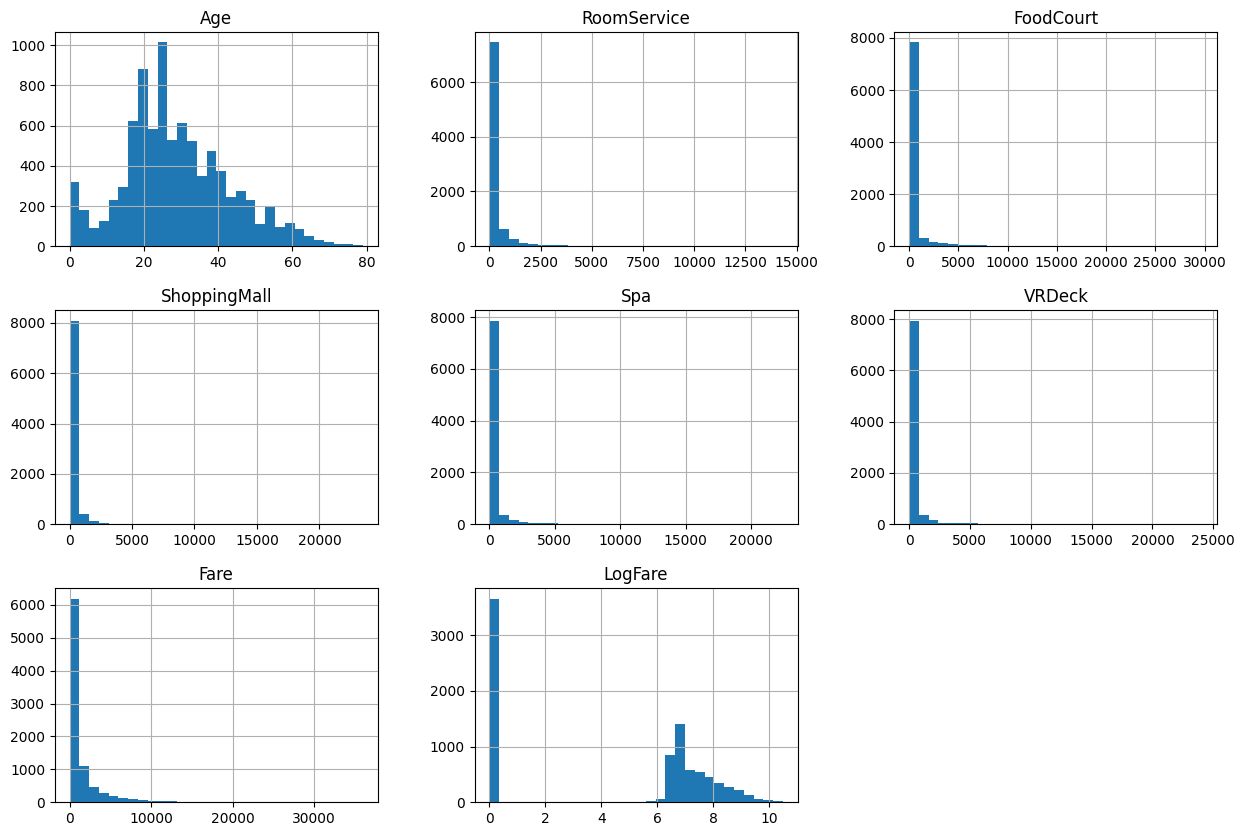

In [ ]:
df.hist(bins=30, figsize=(15, 10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Fare          8693 non-null   float64
 15  LogFare       8693 non-null   float64
dtypes: bool(3), float64(8), object(5)
memory usage: 908.5+ KB


One-Hot Encoding for Categorical Columns

In [ ]:
df.describe(include=[object])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8693
unique,8693,3,6560,3,8473
top,9280_02,Earth,G/734/S,TRAPPIST-1e,Alraium Disivering
freq,1,4803,207,6097,202


In [ ]:
df = pd.get_dummies(df, columns=["HomePlanet","Destination"])
tst_df = pd.get_dummies(tst_df, columns=["HomePlanet","Destination"])

In [ ]:
tst_df.describe(include=[bool])

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
count,4277,4277,4277,4277,4277,4277,4277,4277
unique,2,2,2,2,2,2,2,2
top,False,False,True,False,False,False,False,True
freq,2733,4203,2350,3275,3352,3436,3889,3048


### Descriptive Statistics for Object Columns

The command `df.describe(include=[object])` generates descriptive statistics for columns with object (string) data types in the `df` DataFrame. The output provides:

- **count**: Number of non-null entries in each column.
- **unique**: Number of unique values in each column.
- **top**: Most frequent value in each column.
- **freq**: Frequency of the most frequent value.

### One-Hot Encoding for Categorical Columns

The command `pd.get_dummies(df, columns=["HomePlanet","Destination"])` converts categorical columns into dummy/indicator variables. This creates new binary columns for each category in the specified columns (`HomePlanet` and `Destination`). The operation is applied to both the training (`df`) and test (`tst_df`) DataFrames.

### Descriptive Statistics for Boolean Columns

The command `tst_df.describe(include=[bool])` generates descriptive statistics for columns with boolean data types in the `tst_df` DataFrame. The output provides:

- **count**: Number of non-null entries in each column.
- **unique**: Number of unique values in each column (should be 2 for boolean columns: `True` and `False`).
- **top**: Most frequent value in each column.
- **freq**: Frequency of the most frequent value.

### Function: `proc_bool`

The function `proc_bool(df)` is designed to convert specific boolean columns in a DataFrame to integer type. The conversion is applied to both the training and test DataFrames.

In [ ]:
def proc_bool(df):
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    df["VIP"] = df["VIP"].astype(int)
    df["HomePlanet_Earth"] = df["HomePlanet_Earth"].astype(int)
    df["HomePlanet_Europa"] = df["HomePlanet_Europa"].astype(int)
    df["HomePlanet_Mars"] = df["HomePlanet_Mars"].astype(int)
    df["Destination_55_Cancri-e"] = df["Destination_55 Cancri e"].astype(int)
    df["Destination_PSO_J318.5-22"] = df["Destination_PSO J318.5-22"].astype(int)
    df["Destination_TRAPPIST-1e"] = df["Destination_TRAPPIST-1e"].astype(int)

proc_bool(df)
proc_bool(tst_df)

In [ ]:
df["Transported"] = df["Transported"].astype(int)

- **Purpose**: Convert specific boolean columns in the DataFrame to integer type (0 and 1).
- **Columns Converted**:
  - `CryoSleep`
  - `VIP`
  - `HomePlanet_Earth`
  - `HomePlanet_Europa`
  - `HomePlanet_Mars`
  - `Destination_55_Cancri-e`
  - `Destination_PSO_J318.5-22`
  - `Destination_TRAPPIST-1e`


In [ ]:
df = df.drop(columns=['Destination_55 Cancri e'])
df = df.drop(columns=['Destination_PSO J318.5-22'])
tst_df = tst_df.drop(columns=['Destination_55 Cancri e'])
tst_df = tst_df.drop(columns=['Destination_PSO J318.5-22'])

In [ ]:
df

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Fare,LogFare,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_TRAPPIST-1e,Destination_55_Cancri-e,Destination_PSO_J318.5-22
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,0.000000,0,1,0,1,0,0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,6.602588,1,0,0,1,0,0
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,9.248021,0,1,0,1,0,0
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,8.551981,0,1,0,1,0,0
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,6.995766,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,8536.0,9.052165,0,1,0,0,1,0
8689,9278_01,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0.0,0.000000,1,0,0,0,0,1
8690,9279_01,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1873.0,7.535830,1,0,0,1,0,0
8691,9280_01,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,4637.0,8.442039,0,1,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Cabin                      8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   int64  
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Name                       8693 non-null   object 
 11  Transported                8693 non-null   int64  
 12  Fare                       8693 non-null   float64
 13  LogFare                    8693 non-null   float

### Feature Lists and Target Variable

In [ ]:
cats=["CryoSleep","VIP", "HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars", "Destination_TRAPPIST-1e", "Destination_55_Cancri-e", "Destination_PSO_J318.5-22"]
conts=['Age', 'LogFare']
dep="Transported"

- **Categorical Features (`cats`)**:
  - List of columns representing categorical features, which will typically be used for one-hot encoding or other categorical transformations.
  - `CryoSleep`
  - `VIP`
  - `HomePlanet_Earth`
  - `HomePlanet_Europa`
  - `HomePlanet_Mars`
  - `Destination_TRAPPIST-1e`
  - `Destination_55_Cancri-e`
  - `Destination_PSO_J318.5-22`

- **Continuous Features (`conts`)**:
  - List of columns representing continuous features, which are typically used in regression or normalization.
  - `Age`
  - `LogFare`

- **Target Variable (`dep`)**:
  - The variable that the model is trying to predict.
  - `Transported`


In [ ]:
df.Transported.head()

,Transported
0,0
1,1
2,0
3,0
4,1


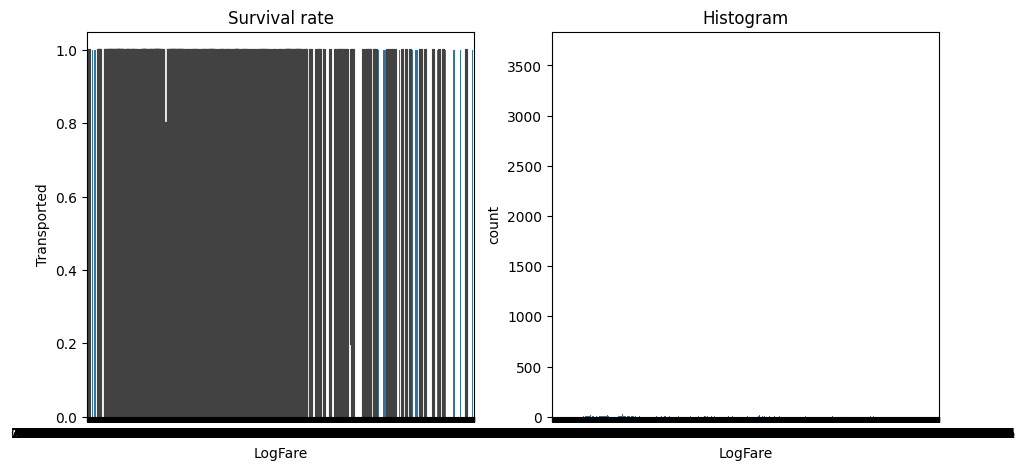

In [ ]:
import seaborn as sns

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=df, y=dep, x="LogFare", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=df, x="LogFare", ax=axs[1]).set(title="Histogram");

### Define Feature and Target Extraction Function

In [ ]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)

In [ ]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

- **Defines a function `xs_y(df)` that extracts features (`xs`) and the target variable from the DataFrame.**
- **`xs` contains columns listed in `cats` and `conts`.**
- **The target variable is returned if it exists in the DataFrame; otherwise, `None` is returned.**

### Generate Predictions

In [ ]:
preds = val_xs.LogFare==1

- **Creates a prediction array (`preds`) based on whether the `LogFare` column in the validation features equals 1.**

### Calculate Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.5022999080036799

- **Imports the `mean_absolute_error` function from `sklearn.metrics`.**
- **Calculates the mean absolute error between the true target values (`val_y`) and the predictions (`preds`).**

### Result

- **Mean Absolute Error**: `0.5022999080036799`

  The mean absolute error (MAE) measures the average magnitude of errors in the predictions, without considering their direction. An MAE of approximately `0.5023` indicates the average difference between the predicted values and the actual values is around `0.5023`. This value can help assess the performance of the predictive model; a lower MAE generally means better model performance.


### Data Visualization and Model Evaluation

**Filter Data and Plot Visualizations**

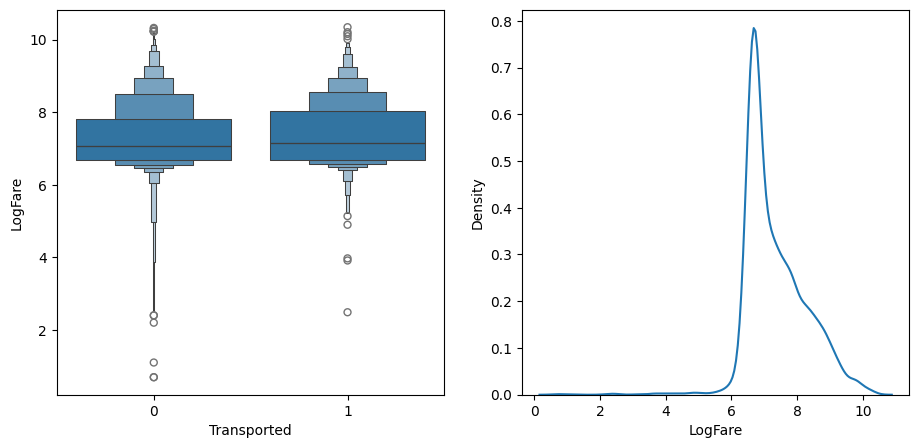

In [ ]:
df_fare = trn_df[trn_df.LogFare>0]
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=df_fare, x=dep, y="LogFare", ax=axs[0])
sns.kdeplot(data=df_fare, x="LogFare", ax=axs[1]);

In [ ]:
preds = val_xs.LogFare>7.5

In [ ]:
mean_absolute_error(val_y, preds)

0.5860165593376265


   - `df_fare` contains rows from `trn_df` where `LogFare` is greater than 0.


   - **Boxen Plot**: The first subplot displays a boxen plot of `LogFare` against the target variable (`dep`). This helps visualize the distribution of `LogFare` across different categories of the target variable.
   - **Kernel Density Plot**: The second subplot shows a KDE plot of `LogFare`, providing a smoothed estimate of its distribution.


   - Creates a prediction array (`preds`) where a value is `True` if `LogFare` is greater than 7.5, and `False` otherwise.


   - Computes the mean absolute error (MAE) between the true target values (`val_y`) and the predictions (`preds`). The MAE measures the average magnitude of errors in the predictions. This evaluation helps assess how well the threshold-based predictions match the actual target values.

### Side Score and Scoring Function

In [ ]:
def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot

In [ ]:
def score(col, y, split):
    lhs = col<=split
    return (_side_score(lhs,y) + _side_score(~lhs,y))/len(y)

In [ ]:
score(trn_xs["CryoSleep"], trn_y, 0.5)

0.4427274084379482

In [ ]:
score(trn_xs["LogFare"], trn_y, 2.7)

0.4386722115002497

- **Purpose**: Computes a score for a given side of a split.
- **Parameters**:
  - `side`: Boolean array indicating which rows are on the side of the split.
  - `y`: The target variable.
- **Logic**:
  - If the total number of elements in the side is less than or equal to 1, the score is 0.
  - Otherwise, the score is the standard deviation of `y` on this side multiplied by the total number of elements in this side.

### Scoring Results

- **Score for `CryoSleep` at split 0.5**: `0.4427274084379482`
  - Measures how well the `CryoSleep` feature, split at 0.5, separates the target variable `trn_y`.
  
- **Score for `LogFare` at split 2.7**: `0.4386722115002497`
  - Measures how well the `LogFare` feature, split at 2.7, separates the target variable `trn_y`.

**Note**: The score is a measure of the quality of the split, with higher scores indicating better separation of the target variable by the feature at the given split point.


**Function Definition (`iscore`):**

  - This function, `iscore`, takes two arguments: `nm` (the name of a column) and `split` (a value used for splitting).
    - It extracts a column `col` from the DataFrame `trn_xs` using `nm` as the column name.
    - It then calls a `score` function (not provided here) on the extracted column and the target variable `trn_y` using the split value.

**Interactive Widgets with `ipywidgets`:**

In [ ]:
def iscore(nm, split):
    col = trn_xs[nm]
    return score(col, trn_y, split)

from ipywidgets import interact
interact(nm=conts, split=15.5)(iscore);

interactive(children=(Dropdown(description='nm', options=('Age', 'LogFare'), value='Age'), FloatSlider(value=1…

In [ ]:
interact(nm=cats, split=2)(iscore);

interactive(children=(Dropdown(description='nm', options=('CryoSleep', 'VIP', 'HomePlanet_Earth', 'HomePlanet_…

 - The `interact` function from the `ipywidgets` library creates an interactive user interface for the `iscore` function.
    - In the first `interact` call, the `nm` argument is tied to a variable `conts` (likely a list of continuous features), and `split` is set to an initial value of `15.5`.
    - In the second `interact` call, the `nm` argument is tied to a variable `cats` (likely a list of categorical features), and `split` is set to an initial value of `2`.
    - When running in a Jupyter environment, these lines create interactive sliders or dropdowns for the user to select values for `nm` and `split`.


**Extracting Unique Values:**

In [ ]:
nm = "LogFare"
col = trn_xs[nm]
unq = col.unique()
unq.sort()
unq

array([ 0.        ,  0.69314718,  1.09861229, ..., 10.29583365, 10.3247932 , 10.34415892])

- The code retrieves and sorts unique values from the "LogFare" column in the `trn_xs` DataFrame.

### Calculating Scores and Extracting Minimum Value:

In [ ]:
scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

0.0

- The `scores` array is generated by applying the `score` function on each unique value (`unq`) of the column (`col`).
- The condition `if not np.isnan(o)` ensures that only non-NaN values are considered.
- The `argmin()` function finds the index of the minimum value in the `scores` array, and this is used to retrieve the corresponding value from `unq`.

### Function `min_col`:

In [ ]:
def min_col(df, nm):
    col,y = df[nm],df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, y, o) for o in unq if not np.isnan(o)])
    idx = scores.argmin()
    return unq[idx],scores[idx]

min_col(trn_df, "Age")

(5.0, 0.49588222217088634)

- This function, `min_col`, takes a DataFrame `df` and column name `nm` as input.
- It extracts the `col` (specified column) and the dependent variable `y`.
- It calculates scores for each unique, non-NaN value in `col` using the `score` function and returns the unique value with the minimum score, along with the score itself.


### Applying `min_col` on Multiple Columns:

In [ ]:
cols = cats+conts
{o:min_col(trn_df, o) for o in cols}

{'CryoSleep': (0, 0.4427274084379482),
 'VIP': (0, 0.4997003165253164),
 'HomePlanet_Earth': (0, 0.49262732535926257),
 'HomePlanet_Europa': (0, 0.4921228311603196),
 'HomePlanet_Mars': (0, 0.4999212060886803),
 'Destination_TRAPPIST-1e': (0, 0.49805643699129726),
 'Destination_55_Cancri-e': (0, 0.4975146234286769),
 'Destination_PSO_J318.5-22': (1, 0.5000218277565598),
 'Age': (5.0, 0.49588222217088634),
 'LogFare': (0.0, 0.4381677196846658)}

- The `min_col` function is applied to the "Age" column of the DataFrame `trn_df`.
- This returns the value in the "Age" column that produces the minimum score.
- A dictionary comprehension is used to calculate the minimum score for each column in `cols`, which consists of both categorical (`cats`) and continuous (`conts`) columns.
- For each column, `min_col` is called, and a dictionary is returned where the keys are the column names, and the values are the results from `min_col`.

### Removing a Column and Splitting the Dataset:

In [ ]:
cols.remove("CryoSleep")
isSleep = trn_df.CryoSleep==1
sleep,noSleep = trn_df[isSleep],trn_df[~isSleep]

- The `"CryoSleep"` column is removed from `cols`.
- The dataset is split into two subsets: `sleep`, which contains rows where `CryoSleep == 1`, and `noSleep`, which contains rows where `CryoSleep != 1`.

### Applying `min_col` on Subsets:

In [ ]:
{o:min_col(sleep, o) for o in cols}

{'VIP': (0, 0.3837817238636689),
 'HomePlanet_Earth': (0, 0.3324940920248624),
 'HomePlanet_Europa': (0, 0.33755676507769095),
 'HomePlanet_Mars': (0, 0.3786057986987219),
 'Destination_TRAPPIST-1e': (0, 0.3843517005617657),
 'Destination_55_Cancri-e': (0, 0.3740458872508508),
 'Destination_PSO_J318.5-22': (0, 0.3807357889360303),
 'Age': (25.0, 0.38204553257058477),
 'LogFare': (0.0, 0.38524640908573105)}

In [ ]:
{o:min_col(noSleep, o) for o in cols}

{'VIP': (1, 0.4730642283444852),
 'HomePlanet_Earth': (0, 0.4726119049767322),
 'HomePlanet_Europa': (0, 0.4709438743367081),
 'HomePlanet_Mars': (0, 0.4726373259650845),
 'Destination_TRAPPIST-1e': (0, 0.4727980400075047),
 'Destination_55_Cancri-e': (0, 0.47260926249874624),
 'Destination_PSO_J318.5-22': (1, 0.4730642283444852),
 'Age': (12.0, 0.46380962227595895),
 'LogFare': (0.0, 0.4613833215313755)}

- The `min_col` function is applied to each column in the `sleep` subset, and a dictionary is generated with the column names as keys and the minimum score for each column as values.
- Similarly, the `min_col` function is applied to each column in the `noSleep` subset, producing another dictionary with the same structure.

- The `min_col` function is used to calculate the value that minimizes the score for each column in the dataset.
- The code first applies this function to the full dataset, and then to two subsets: one where passengers are in CryoSleep, and one where they are not.
- The results show the optimal splits for each feature and subset of data.


# Fit a Decision Tree model with a maximum of 4 leaf nodes

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [ ]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))


Parameters:
    - t: Trained decision tree model
    - df: DataFrame containing feature names
    - size: Size of the tree diagram
    - ratio: Ratio of the tree diagram
    - precision: Decimal precision for node values
    - **kwargs: Additional keyword arguments for export_graphviz

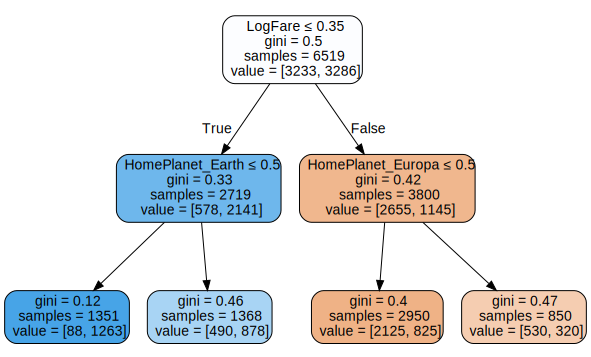

In [ ]:
draw_tree(m, trn_xs, size=10)

### Function `gini`:
- The function `gini` calculates the Gini impurity for a subset of the data.
- It takes a condition `cond` as input, which is used to filter rows from the DataFrame `df` based on the condition.
- `act` represents the dependent variable (`dep`) values where the condition is met.
- The Gini impurity is computed using the formula:
  \[
  1 - (\text{mean of act})^2 - (1 - \text{mean of act})^2
  \]
  This measures the impurity of the data, where lower values indicate more homogeneity.
- The function is then applied to two conditions:
  - Rows where `CryoSleep == 'noSleep'`.
  - Rows where `CryoSleep == 'sleep'`.

In [ ]:
def gini(cond):
    act = df.loc[cond, dep]
    return 1 - act.mean()**2 - (1-act).mean()**2

### Applying Gini:
- `gini(df.CryoSleep=='noSleep')` calculates the Gini impurity for rows where `CryoSleep` is labeled as `'noSleep'`.
- `gini(df.CryoSleep=='sleep')` calculates the Gini impurity for rows where `CryoSleep` is labeled as `'sleep'`.

In [ ]:
gini(df.CryoSleep=='noSleep'), gini(df.CryoSleep=='sleep')

(nan, nan)

### Calculating Mean Absolute Error:

In [ ]:
mean_absolute_error(val_y, m.predict(val_xs))

0.25850965961361544

- `mean_absolute_error(val_y, m.predict(val_xs))` calculates the mean absolute error (MAE) between the actual values (`val_y`) and the predicted values from the model (`m.predict(val_xs)`).
  - `val_y` represents the actual target values.
  - `m.predict(val_xs)` represents the model's predicted values based on the validation set `val_xs`.
  - The MAE gives an indication of the average error in predictions made by the model.

  ### Interpretation of the Result:

- The **Mean Absolute Error (MAE)** of `0.2585` means that, on average, the model's predictions are off by around **0.2585** units from the actual values.
- MAE is a good indicator of how well your model is performing, with a lower value indicating better predictive accuracy.

### Decision Tree Model Training and Evaluation

- `m = DecisionTreeClassifier(min_samples_leaf=50)`: Creates a decision tree classifier object with a minimum of 50 samples required to be at a leaf node. This helps prevent overfitting and creates a more generalized model.


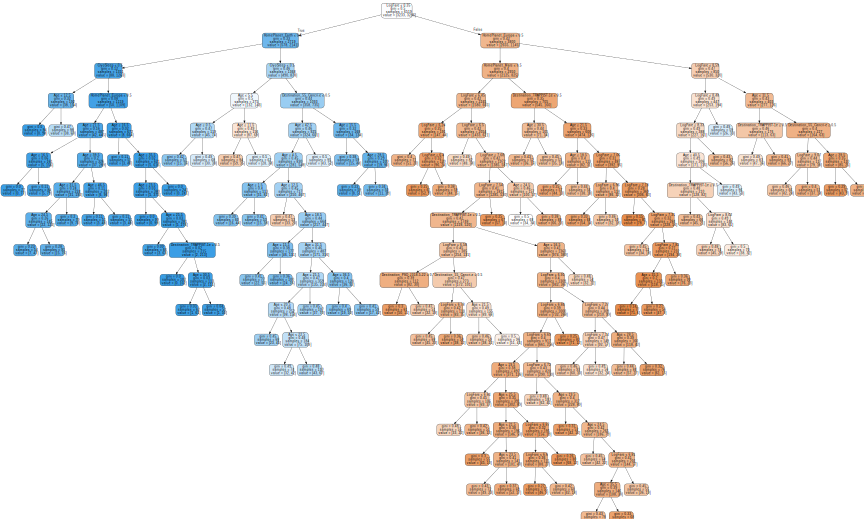

In [ ]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

- `m.fit(trn_xs, trn_y)`: Trains the decision tree classifier using the training features (`trn_xs`) and target variables (`trn_y`).

- `draw_tree(m, trn_xs, size=12)`: Visualizes the trained decision tree. The `draw_tree` function (defined elsewhere in the code) likely uses `export_graphviz` from `sklearn.tree` to generate a graphical representation of the tree structure.

In [ ]:
mean_absolute_error(val_y, m.predict(val_xs))

0.2667893284268629

- `mean_absolute_error(val_y, m.predict(val_xs))`:  Evaluates the model's performance on the validation set.
    - `m.predict(val_xs)` generates predictions on the validation features.
    - `mean_absolute_error` calculates the average absolute difference between the predicted and actual values.

- `0.2667893284268629`: This is the calculated Mean Absolute Error (MAE).  An MAE of 0.2668 indicates that, on average, the model's predictions are off by about 0.2668 units from the actual values.

### Generate and Save Predictions

In [ ]:
tst_xs,_ = xs_y(tst_df)

def subm(preds, suff):
    tst_df['Transported'] = preds
    sub_df = tst_df[['PassengerId','Transported']]
    sub_df.to_csv(f'sub-{suff}.csv', index=False)

subm(m.predict(tst_xs), 'tree')

In [ ]:
sub_df = pd.read_csv('sub-tree.csv')

In [ ]:
sub_df['Transported'] = sub_df['Transported'].astype(bool)

In [ ]:
sub_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [ ]:
sub_df.to_csv('subTree.csv', index=False)

- `tst_xs,_ = xs_y(tst_df)`: Extracts features (`tst_xs`) from the test dataset (`tst_df`) using the `xs_y` function (defined previously). The `_` is used to discard the target variable (which is `None` for the test set).

- `def subm(preds, suff)`: Defines a function `subm` to create a submission file with predictions.
    - `preds`: Predictions for the test set.
    - `suff`: Suffix for the filename.

- `tst_df['Transported'] = preds`: Adds the predictions (`preds`) as a new column named "Transported" to the test DataFrame (`tst_df`).

- `sub_df = tst_df[['PassengerId','Transported']]`: Creates a new DataFrame `sub_df` containing only the 'PassengerId' and 'Transported' columns. This is typically the format required for submitting predictions to a competition or evaluation platform.

- `sub_df.to_csv(f'sub-{suff}.csv', index=False)`: Saves the `sub_df` DataFrame to a CSV file. The filename is generated using an f-string with the suffix (`suff`) provided. `index=False` ensures that the row indices are not included in the CSV file.

- `subm(m.predict(tst_xs), 'tree')`: Calls the `subm` function to generate and save predictions from the trained decision tree model (`m`) on the test features (`tst_xs`). The suffix 'tree' is used for the filename, indicating that these are predictions from a decision tree model.

### The Random Forest

### Building a Basic Ensemble of Decision Trees

In [ ]:
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

- `def get_tree(prop=0.75)`: Defines a function to create a decision tree with a subset of the training data.
    - `prop`: Proportion of the training data to use (default is 75%).
    - `n = len(trn_y)`: Gets the number of training samples.
    - `idxs = random.choice(n, int(n*prop))`:  Randomly selects indices for the subset.
    - `return DecisionTreeClassifier(min_samples_leaf=5).fit(...)`: Creates and trains a decision tree using the subset.


In [ ]:
trees = [get_tree() for t in range(100)]

In [ ]:
all_probs = [t.predict(val_xs) for t in trees]
avg_probs = np.stack(all_probs).mean(0)

mean_absolute_error(val_y, avg_probs)

0.3256163753449862

- `trees = [get_tree() for t in range(100)]`: Creates a list of 100 decision trees by calling `get_tree()` repeatedly. Each tree is trained on a different random subset of the training data.

- `all_probs = [t.predict(val_xs) for t in trees]`: Gets predictions from each tree on the validation set (`val_xs`).

- `avg_probs = np.stack(all_probs).mean(0)`: Calculates the average prediction across all trees.

- `mean_absolute_error(val_y, avg_probs)`: Evaluates the average predictions using mean absolute error (MAE).

- `0.3256163753449862`: The calculated MAE for the ensemble predictions. This indicates the average error of the ensemble model on the validation set.

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
random_state = 123
rf = RandomForestClassifier(100, min_samples_leaf=5)
classifier  = GradientBoostingClassifier(random_state=random_state)
rf.fit(trn_xs, trn_y);
mean_absolute_error(val_y, rf.predict(val_xs))

0.2626494940202392

- `from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier`: Imports the `RandomForestClassifier` and `GradientBoostingClassifier` classes from scikit-learn.

- `random_state = 123`: Sets a random state for reproducibility. This ensures that the random forest will produce the same results each time the code is run with the same data.

- `rf = RandomForestClassifier(100, min_samples_leaf=5)`: Creates a `RandomForestClassifier` object.
    - `100`:  Specifies that the forest should have 100 trees.
    - `min_samples_leaf=5`: Sets the minimum number of samples required to be at a leaf node (similar to the decision tree).

- `classifier = GradientBoostingClassifier(random_state=random_state)`: Creates a `GradientBoostingClassifier` object with the specified random state. Although this line of code is included, it is not used in the rest of the provided code snippet.

- `rf.fit(trn_xs, trn_y)`: Trains the random forest classifier on the training data (`trn_xs` and `trn_y`).

- `mean_absolute_error(val_y, rf.predict(val_xs))`: Evaluates the model's performance on the validation set (`val_xs` and `val_y`) using mean absolute error.

### Random Forest Results

- **Mean Absolute Error (MAE):** 0.2626

This indicates that the random forest model performs well, with an average prediction error of approximately 0.2626 units.

**Comparison:**

This model shows improvement over previous models:

- Single Decision Tree (min_samples_leaf=50): MAE of 0.2668
- Basic Ensemble Method: MAE of 0.3256

**Conclusion:**

The random forest demonstrates the effectiveness of ensemble learning in achieving higher prediction accuracy. Further improvements might be possible through hyperparameter tuning or exploring other ensemble methods like Gradient Boosting.

In [ ]:
subm(rf.predict(tst_xs), 'rf')

In [ ]:
rfdf = pd.read_csv('sub-rf.csv')

In [ ]:
rfdf['Transported'] = rfdf['Transported'].astype(bool)

In [ ]:
rfdf.to_csv('subrf.csv', index=False)

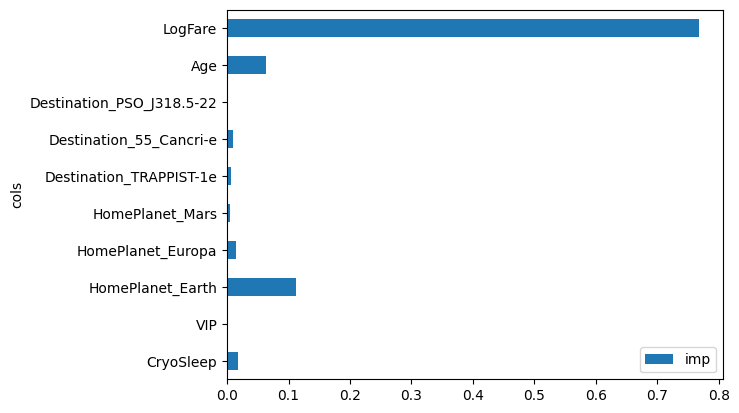

In [ ]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');